# Ingeniero de Datos Nequi: Prueba Técnica

#### Propósito
El propósito de esta prueba es verificar tus conocimientos en el campo de la ingeniería
de datos. (indiferente de los “framework” o lenguajes de programación que utilices)
esperamos que sea la oportunidad de combinar lo que haz aprendido a lo largo de tu
experiencia profesional y mezclarlo con tu capacidad de abstracción y analítica.

El resultado será la base.

En este test, tienes libertad de elegir el lenguaje de programación de su preferencia
[ Sugerimos Python ;) ].

#### Instrucciones

## Paso 1: Alcance del proyecto y captura de datos

Dado que el alcance la prueba dependerá en gran medida de los datos, En este paso,
debes:

1. Identificar y recopilar los datos que usaras para tu proyecto (Recuerda al menos tres fuentes y más de un millón de filas).
2. Explicar para qué casos de uso final deseas preparar los datos, por ejemplo: tabla de análisis, aplicación de fondo, base de datos de fuentes de verdad, etc.)

### Desarrollo:

1. Debido a que uno de los requerimientos del ejercicio era crear un dataset con mas de 1 millón de filas y ser extraido de 3 fuentes con 2 formatos diferentes (csv, api, json, parquet, etc.), decidí buscar una base de datos de música de alguna aplicación que ademas contara con una API.

    Al realizar la busqueda correspondiente, encontre en la página de Kaggle 2 bases de datos en formato .csv las cuales al explorarlas me di cuenta que podrían ser de gran utilidad para el ejercicio.

    La tercer base de datos la extraje con la ayuda de la API de SPOTIFY, donde me registré y realice las consultas necesarias para sacar la información necesaria para completar las bases de datos de Kaggle.

    Las bases de datos fueron descargadas de:
    - FuenteK1: https://www.kaggle.com/datasets/rodolfofigueroa/spotify-12m-songs/code?select=tracks_features.csv
    - FuenteK2: https://www.kaggle.com/code/vatsalmavani/music-recommendation-system-using-spotify-dataset/data
    - FuenteAPI: https://developer.spotify.com/dashboard/login

2. Una vez descargadas las bases de datos realicé un análisis exploratorio para determinar cual iba a ser la finalidad del proyecto. El objetivo del proyecto sería realizar un modelo que permita predecir la popularidad de una canción en base a unas features o caracteristicas propias de la canción donde se espera tener un porcentaje de precisión superior al 70%.

## Paso 2: Explorar y evaluar los datos, el EDA.

1. Explorar los datos para identificar problemas de calidad de los datos, como valores perdidos, datos duplicados, problemas de formato etc.
2. Documentar los pasos necesarios para limpiar los datos, indicar que tipo de pasos se sugieren para la limpieza. Tip se puede usar un diagrama, mapa mental o adición en la arquitectura del paso siguiente con el fin de dejar claro este paso.

### Desarrollo:

#### Importamos las librerias
Cargamos las librerias de Python para el procesamiento, visualización y modelado de los datos.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix, accuracy_score, roc_curve, auc, explained_variance_score, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import catboost as cb

#### Importamos los datasets
Cargamos los 3 datasets extraidos de Kaggle y la API de Spotify.

In [2]:
data1 = pd.read_csv('FuenteK1.csv')
data2 = pd.read_csv('FuenteK2.csv')
data3 = pd.read_csv('FuenteAPI.csv')

#### Tamaño de los datasets
Visualizamos el tamaño de cada uno de los 3 datasets.

In [3]:
print(data1.shape, data2.shape, data3.shape)

(1204025, 24) (170653, 19) (5600, 21)


#### Información de los 3 datasets
Visualizamos infromación de los datasets como nombres de columnas, cantidad de datos no nulos y tipos de variables.

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204025 non-null  object 
 2   album             1204025 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [6]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5599 non-null   object 
 1   album             5599 non-null   object 
 2   artists           5599 non-null   object 
 3   year              5600 non-null   object 
 4   duration_ms       5600 non-null   int64  
 5   track_number      5600 non-null   int64  
 6   disc_number       5600 non-null   int64  
 7   explicit          5600 non-null   bool   
 8   danceability      5600 non-null   float64
 9   energy            5600 non-null   float64
 10  key               5600 non-null   int64  
 11  loudness          5600 non-null   float64
 12  mode              5600 non-null   int64  
 13  speechiness       5600 non-null   float64
 14  acousticness      5600 non-null   float64
 15  instrumentalness  5600 non-null   float64
 16  liveness          5600 non-null   float64


#### Nombres de las columnas
Visualizamos los nombres de las columnas diferentes de los 3 datasets.

In [7]:
print(data1.columns.difference(data2.columns))
print(data2.columns.difference(data1.columns))
print(data1.columns.difference(data3.columns))
print(data3.columns.difference(data1.columns))
print(data2.columns.difference(data3.columns))
print(data3.columns.difference(data2.columns))

Index(['album', 'album_id', 'artist_ids', 'disc_number', 'time_signature',
       'track_number'],
      dtype='object')
Index(['popularity'], dtype='object')
Index(['album_id', 'artist_ids', 'id', 'release_date'], dtype='object')
Index(['popularity'], dtype='object')
Index(['id', 'release_date'], dtype='object')
Index(['album', 'disc_number', 'time_signature', 'track_number'], dtype='object')


#### Eliminar columnas
Eliminamos las columnas del dataset 1: 'album', 'album_id', 'artist_ids', 'disc_number', 'time_signature', 'id', 'release_date' y 'track_number'.

In [8]:
data1.drop(['album','album_id','artist_ids','disc_number','time_signature','id','release_date','track_number'],
           axis = 1, inplace = True)

Eliminamos las columnas del dataset 2: 'id' y 'release_date'.

In [9]:
data2.drop(['id','release_date'], axis = 1, inplace = True)

Eliminamos las columnas del dataset 3: 'album', 'disc_number', 'time_signature' y 'track_number'.

In [10]:
data3.drop(['album','disc_number','time_signature','track_number'], axis = 1, inplace = True)

#### Crear columnas
Creamos la columna 'popularity' en el dataset1.

In [11]:
data1['popularity'] = pd.Series()

#### Revisar columnas
Visualizamos nuevamente los nombres de las columnas diferentes de los 3 datasets.

In [12]:
print(data1.columns.difference(data2.columns))
print(data2.columns.difference(data1.columns))
print(data1.columns.difference(data3.columns))
print(data3.columns.difference(data1.columns))
print(data2.columns.difference(data3.columns))
print(data3.columns.difference(data2.columns))

Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


Los 3 datasets contienen las mismas columnas.

#### Organizar columnas
Reorganizamos las columnas de los 3 datasets con el objetivo de consolidar la información en un unico dataset.

In [13]:
data1 = data1.reindex(columns = data3.columns)
data2 = data2.reindex(columns = data3.columns)

Validamos si las columnas de los 3 datasets están en el mismo orden.

In [14]:
data1.columns.equals(data2.columns) == data1.columns.equals(data3.columns)

True

#### Calidad de los datos
Observamos la columna 'artists' del dataset 1 y del dataset 2.

In [15]:
data1.artists

0          ['Rage Against The Machine']
1          ['Rage Against The Machine']
2          ['Rage Against The Machine']
3          ['Rage Against The Machine']
4          ['Rage Against The Machine']
                       ...             
1204020                     ['FVLCRVM']
1204021                     ['FVLCRVM']
1204022                     ['FVLCRVM']
1204023                     ['FVLCRVM']
1204024                     ['FVLCRVM']
Name: artists, Length: 1204025, dtype: object

In [16]:
data2.artists

0         ['Sergei Rachmaninoff', 'James Levine', 'Berli...
1                                            ['Dennis Day']
2         ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...
3                                          ['Frank Parker']
4                                            ['Phil Regan']
                                ...                        
170648    ['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...
170649                                         ['Ashnikko']
170650                                          ['MAMAMOO']
170651                                           ['Eminem']
170652                                ['KEVVO', 'J Balvin']
Name: artists, Length: 170653, dtype: object

Eliminamos caracteres especiales de la columna 'artists'.

In [17]:
data1['artists'] = data1.artists.apply(lambda x: x[2:-2])
data2['artists'] = data2.artists.apply(lambda x: x[2:-2])

Observamos la columna 'year' del dataset 3.

In [18]:
data3.year.value_counts()

2019-07-26    39
2020-09-25    39
2019-12-06    39
2020-07-10    34
2020-07-24    32
              ..
2013-11-25     1
2021-04-12     1
1977-06-20     1
2020-09-23     1
2020-08-22     1
Name: year, Length: 1635, dtype: int64

Modificamos el formato de la fecha a solo año

In [19]:
data3['year'] = data3.year.apply(lambda x: x[0:4]).astype(str).astype(int)

#### Consolidamos los datasets
Creamos un solo dataset con la información de los 3 datasets.
Reseteamos los indices para llevar un consecutivo.

In [20]:
data = pd.concat([data1, data2, data3], axis = 0)
data.reset_index(drop = True, inplace = True)
data.head()

,name,artists,year,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,Testify,Rage Against The Machine,1999,210133,0,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,NaN
1,Guerrilla Radio,Rage Against The Machine,1999,206200,1,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,NaN
2,Calm Like a Bomb,Rage Against The Machine,1999,298893,0,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,NaN
3,Mic Check,Rage Against The Machine,1999,213640,1,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,NaN
4,Sleep Now In the Fire,Rage Against The Machine,1999,205600,0,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,NaN


#### Matriz de correlación
Graficamos la correlación entre las diferentes variables del dataset

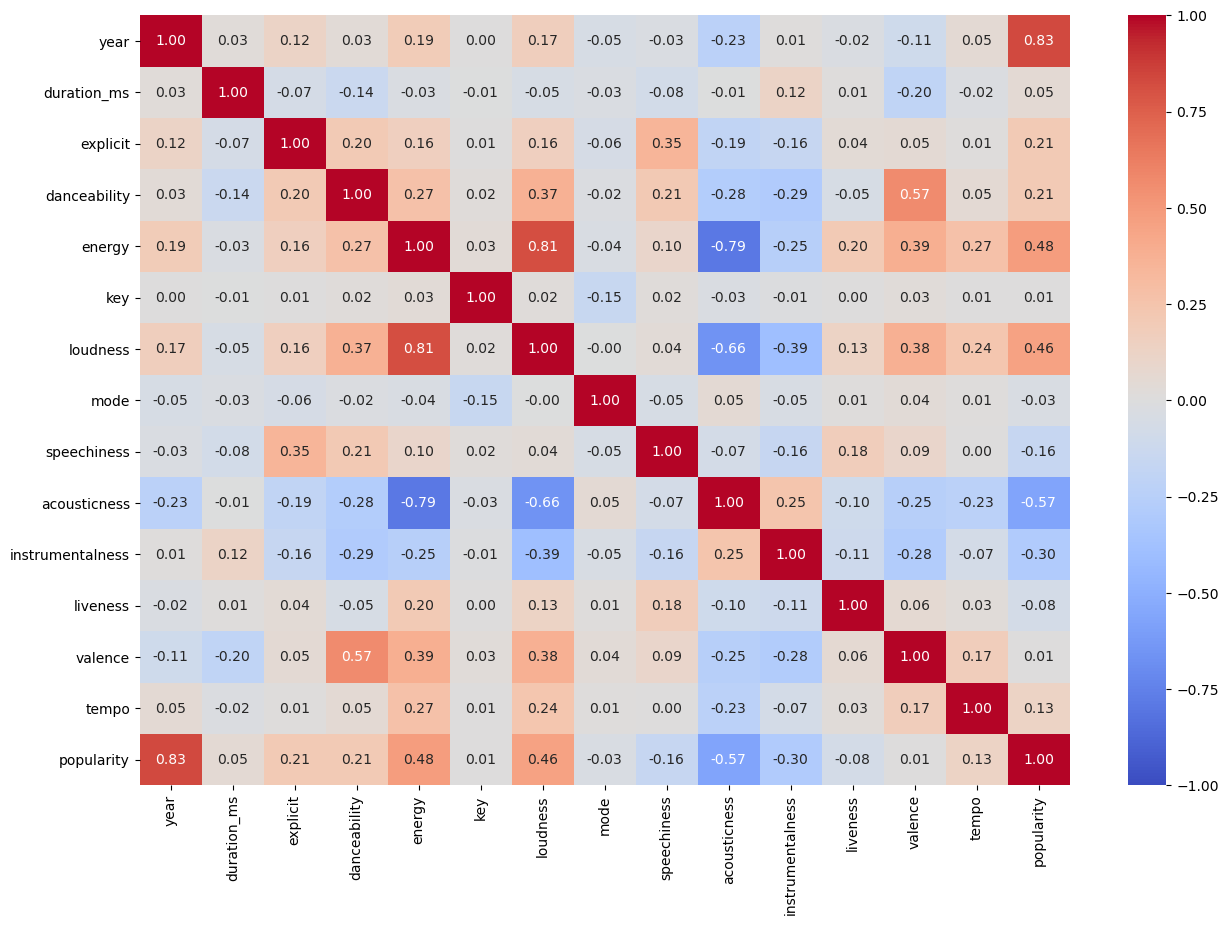

In [21]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True, vmin = -1, cmap = 'coolwarm', fmt=".2f")
plt.show()

#### Información del dataset
Información del dataset como nombres de columnas, cantidad de datos no nulos y tipos de variables.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380278 entries, 0 to 1380277
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   name              1380277 non-null  object 
 1   artists           1380277 non-null  object 
 2   year              1380278 non-null  int64  
 3   duration_ms       1380278 non-null  int64  
 4   explicit          1380278 non-null  int64  
 5   danceability      1380278 non-null  float64
 6   energy            1380278 non-null  float64
 7   key               1380278 non-null  int64  
 8   loudness          1380278 non-null  float64
 9   mode              1380278 non-null  int64  
 10  speechiness       1380278 non-null  float64
 11  acousticness      1380278 non-null  float64
 12  instrumentalness  1380278 non-null  float64
 13  liveness          1380278 non-null  float64
 14  valence           1380278 non-null  float64
 15  tempo             1380278 non-null  float64
 16  

Información estadística del dataset.

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1380278.0,2003.585123,17.767251,0.0,2000.000000,2008.00000,2015.0000,2023.000
duration_ms,1380278.0,246437.692403,158038.881764,0.0,173307.000000,222013.00000,282707.0000,6061090.000
explicit,1380278.0,0.072488,0.259294,0.0,0.000000,0.00000,0.0000,1.000
danceability,1380278.0,0.499109,0.188708,0.0,0.364000,0.50700,0.6390,1.000
energy,1380278.0,0.506566,0.291348,0.0,0.253000,0.51700,0.7580,1.000
key,1380278.0,5.195177,3.534368,0.0,2.000000,5.00000,8.0000,11.000
loudness,1380278.0,-11.749399,6.831814,-60.0,-15.110000,-9.87400,-6.7560,7.234
mode,1380278.0,0.675468,0.468200,0.0,0.000000,1.00000,1.0000,1.000
speechiness,1380278.0,0.086280,0.122854,0.0,0.035100,0.04470,0.0729,0.970
acousticness,1380278.0,0.452851,0.384334,0.0,0.043300,0.40400,0.8640,0.996


Cantidad de registros unicos de cada columna del dataset

In [24]:
data.nunique()

name                938094
artists             188911
year                   109
duration_ms         220127
explicit                 2
danceability          1477
energy                3639
key                     12
loudness             44355
mode                     2
speechiness           1772
acousticness          5875
instrumentalness      5939
liveness              1927
valence               2042
tempo               154253
popularity             101
dtype: int64

#### Datos duplicados
Contamos la cantidad de datos duplicados y los eliminamos del dataset

In [25]:
print(data.duplicated().sum())
data.drop_duplicates(inplace = True)

11525


#### Calidad de los datos
Observamos la columna 'year' del dataset.

In [26]:
data.year.value_counts()

2020    71174
2019    67592
2006    58821
2007    58153
2018    57253
        ...  
1909       25
1908       19
1900       14
0          11
2023        2
Name: year, Length: 109, dtype: int64

Visualizamos las filas con registros de año 0 

In [27]:
data[data.year == 0]

,name,artists,year,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
815351,Jimmy Neutron,iCizzle,0,183000,0,0.795,0.562,2,-11.327,1,0.0519,0.01560,0.439,0.0860,0.389,109.985,NaN
815352,I Luv You,iCizzle,0,145161,0,0.762,0.328,2,-14.319,0,0.0950,0.88700,0.909,0.1060,0.728,92.962,NaN
815353,My Heart,iCizzle,0,176561,0,0.671,0.545,6,-15.363,0,0.0662,0.00956,0.902,0.0455,0.893,97.865,NaN
815354,I Am (Invincible),iCizzle,0,192000,0,0.759,0.582,10,-12.985,0,0.1280,0.00544,0.895,0.0538,0.537,89.989,NaN
815355,Flower Power,iCizzle,0,138666,0,0.657,0.550,5,-13.842,0,0.2810,0.01800,0.245,0.2410,0.964,179.904,NaN
815356,Heard It Low,iCizzle,0,138667,0,0.728,0.499,1,-12.557,1,0.0673,0.00785,0.275,0.0865,0.662,90.010,NaN
815357,Hangin On,iCizzle,0,142620,0,0.822,0.720,10,-14.481,0,0.0758,0.11500,0.881,0.1210,0.766,119.998,NaN
815358,God Loves You,iCizzle,0,161000,0,0.845,0.673,7,-12.835,1,0.0662,0.00274,0.548,0.0393,0.472,120.090,NaN
815359,You In My Life,iCizzle,0,214867,0,0.957,0.104,7,-22.989,1,0.0623,0.13300,0.857,0.0968,0.258,112.987,NaN
815360,I Wonder,iCizzle,0,180822,0,0.659,0.453,5,-17.464,0,0.0581,0.00196,0.854,0.3710,0.877,146.020,NaN


Eliminamos las filas con registro de años 0

In [28]:
data.drop(index = data[data.year == 0].index, inplace = True)

#### Información final del dataset

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1368742 entries, 0 to 1380277
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   name              1368742 non-null  object 
 1   artists           1368742 non-null  object 
 2   year              1368742 non-null  int64  
 3   duration_ms       1368742 non-null  int64  
 4   explicit          1368742 non-null  int64  
 5   danceability      1368742 non-null  float64
 6   energy            1368742 non-null  float64
 7   key               1368742 non-null  int64  
 8   loudness          1368742 non-null  float64
 9   mode              1368742 non-null  int64  
 10  speechiness       1368742 non-null  float64
 11  acousticness      1368742 non-null  float64
 12  instrumentalness  1368742 non-null  float64
 13  liveness          1368742 non-null  float64
 14  valence           1368742 non-null  float64
 15  tempo             1368742 non-null  float64
 16  

## Paso 3: Definir el modelo de datos

1. Trazar el modelo de datos conceptuales y explicar por qué se eligió ese modelo.
2. Diseñar la arquitectura y los recursos utilizados.
3. Indique claramente los motivos de la elección de las herramientas y tecnologías para el proyecto.
4. Proponga con qué frecuencia deben actualizarse los datos y por qué.

### Desarrollo:

Debido a la naturaleza del problema, se decide usar un modelo de regresión que sea robusto y preciso pero fácil de implementar. Para este ejercicio usamos el modelo de regresón de CatBoost que mejora los arboles de decisión mediante un aumento del gradiente.

Este algoritmo se utiliza para búsqueda, sistemas de recomendación, asistente personal, automóviles autónomos, predicción del tiempo por lo cual lo hace ideal para nuestro conjunto de datos.

La idea de nuestro proyecto es realizar la predicción de la popularidad de una cancion, la cual varia entre 0 y 100, de acuerdo a unas características propias por lo cual se decide separar el dataset en 2.

El primer dataset será para realizar la predicción de la popularidad y el segundo dataset sera para realizar el entrenamiento y la prueba del modelo Catboost. 

#### Separación de datos
Creamos el dataset con el que se realizará el modelo de predicción y eliminamos las variables categóricas.

In [30]:
data_modelo = data.dropna()
data_modelo.drop(['name', 'artists'], axis = 1, inplace = True)

In [31]:
data_modelo

,year,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
1204025,1921,831667,0,0.279,0.211,10,-20.096,1,0.0366,0.98200,0.878000,0.6650,0.0594,80.954,4.0
1204026,1921,180533,0,0.819,0.341,7,-12.441,1,0.4150,0.73200,0.000000,0.1600,0.9630,60.936,5.0
1204027,1921,500062,0,0.328,0.166,3,-14.850,1,0.0339,0.96100,0.913000,0.1010,0.0394,110.339,5.0
1204028,1921,210000,0,0.275,0.309,5,-9.316,1,0.0354,0.96700,0.000028,0.3810,0.1650,100.109,3.0
1204029,1921,166693,0,0.418,0.193,3,-10.096,1,0.0380,0.95700,0.000002,0.2290,0.2530,101.665,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380273,2020,213333,1,0.480,0.602,10,-6.335,0,0.3680,0.48700,0.000000,0.0848,0.2690,179.798,78.0
1380274,2020,158466,1,0.739,0.616,7,-6.963,0,0.0338,0.25200,0.000002,0.1010,0.6540,91.071,69.0
1380275,2020,160000,1,0.709,0.548,10,-8.493,1,0.3530,0.65000,0.000002,0.1330,0.5430,83.995,81.0
1380276,2020,164579,1,0.688,0.647,2,-7.258,1,0.1900,0.00815,0.000017,0.0950,0.1950,88.834,77.0


#### Selección del modelo y ajuste de hiperparámetros
Creamos el objeto con el modelo a utilizar y sus hiperparámetros

In [32]:
model_cat = cb.CatBoostRegressor(verbose = False, thread_count = -1, random_state = 0)

#### Estandarización
Estandarizamos el dataset con media 0 y desviación estandar 1.

In [33]:
scaler = StandardScaler()
scaler.fit(data_modelo)
data_normalized = scaler.transform(data_modelo)

print('Standardized means:', np.mean(data_normalized, axis = 0).round(2))
print('Standardized deviations:', np.std(data_normalized, axis = 0).round(2))

Standardized means: [ 0.  0. -0.  0.  0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0.]
Standardized deviations: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Creamos un nuevo dataset con la estandarización realizada.

In [34]:
data_normalized = pd.DataFrame(data_normalized, index = data_modelo.index, columns = data_modelo.columns)
data_normalized.describe().round(2)

,year,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
count,175599.00,175599.00,175599.00,175599.00,175599.00,175599.00,175599.00,175599.00,175599.00,175599.00,175599.00,175599.00,175599.00,175599.00,175599.00
mean,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.16,-1.81,-0.33,-3.07,-1.83,-1.48,-8.59,-1.54,-0.61,-1.31,-0.52,-1.18,-2.01,-3.81,-1.45
25%,-0.80,-0.48,-0.33,-0.69,-0.85,-0.91,-0.55,-1.54,-0.40,-1.06,-0.52,-0.61,-0.81,-0.77,-0.91
50%,0.03,-0.19,-0.33,0.06,-0.03,-0.06,0.16,0.65,-0.33,0.00,-0.52,-0.40,0.04,-0.07,0.09
75%,0.87,0.25,-0.33,0.74,0.82,0.80,0.75,0.65,-0.13,1.04,-0.25,0.32,0.83,0.61,0.77
max,1.70,41.54,3.02,2.53,1.93,1.65,2.68,0.65,5.38,1.34,2.71,4.57,1.80,4.12,3.08


#### Vector Target
Separamos el dataset en vectores predictores y vector target.

In [35]:
X = data_modelo.drop(['popularity'], axis = 1)
y = data_modelo.popularity

#### Train y Test
Separamos el dataset en datos de entrenamiento y de testeo.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, shuffle = True)

#### Ajuste del modelo

In [37]:
model_cat.fit(X_train, y_train)

#### Validación del modelo
Validamos el modelo con los datos de test

In [38]:
y_pred = model_cat.predict(X_test)
y_pred

array([-1.13333776,  0.41094623, -0.38500217, ..., 38.16542843,
        6.92557188, 36.47854504])

#### Desempeño del Modelo
Evaluamos el desempeño del modelo a través del R^2

In [39]:
r2_score(y_test, y_pred)

0.7770642293207453

#### Predicción de popularidad
Creamos el dataset para realizar la predicción de popularidad de algunas canciones.

In [40]:
data_pred = data[data.popularity.isna()]
data_pred = data_pred.drop(['name', 'artists','popularity'], axis = 1, inplace = False)
data_pred.shape

(1193143, 14)

Predecimos la popularidad de las canciones de dataset creado con el modelo ya entrenado.

In [41]:
y_pred_2 = model_cat.predict(data_pred)

Asignamos la popularidad predicha por el modelo al dataset creado

In [42]:
data_pred = data[data.popularity.isna()]
data_pred['popularity'] = y_pred_2.round(0).astype(int)

#### Dataset final
Creamos el dataset final donde esta el dataset utilizado para realizar el modelo y la predicción.

In [43]:
data_modelo = data.dropna()
data_final = pd.concat([data_pred, data_modelo], axis = 0)
data_final

,name,artists,year,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,Testify,Rage Against The Machine,1999,210133,0,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,47.0
1,Guerrilla Radio,Rage Against The Machine,1999,206200,1,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,48.0
2,Calm Like a Bomb,Rage Against The Machine,1999,298893,0,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,46.0
3,Mic Check,Rage Against The Machine,1999,213640,1,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,47.0
4,Sleep Now In the Fire,Rage Against The Machine,1999,205600,0,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380273,Mood Swings (feat. Lil Tjay),Pop Smoke,2020,213333,1,0.480,0.602,10,-6.335,0,0.3680,0.48700,0.000000,0.0848,0.269,179.798,78.0
1380274,Something Special,Pop Smoke,2020,158466,1,0.739,0.616,7,-6.963,0,0.0338,0.25200,0.000002,0.1010,0.654,91.071,69.0
1380275,What You Know Bout Love,Pop Smoke,2020,160000,1,0.709,0.548,10,-8.493,1,0.3530,0.65000,0.000002,0.1330,0.543,83.995,81.0
1380276,Got It On Me,Pop Smoke,2020,164579,1,0.688,0.647,2,-7.258,1,0.1900,0.00815,0.000017,0.0950,0.195,88.834,77.0


#### Exportar Dataset
Exportamos el dataset a un archivo .csv

In [44]:
data_final.to_csv('Data-final.csv', index = False)

#### Bases de datos trabajadas
Las bases de datos extraidas se encuentran subidas en una carpeta de Google Drive en el siguiente enlace:
https://drive.google.com/drive/folders/1y-cZJKyqvt47oKBm9h2i0W56fGtqpgEv

#### Actualización de datos
No es muy necesario realizar la actualización de la base de datos con frecuencia ya que los valores de las caracteristicas de las canciones no van a cambiar a través del tiempo. Lo que si seria necesario es extraer mas datos de la API de spotify para incrementar la cantidad de registros del dataset y poder tener mas información para realizar nuevos modelos de predicción por lo cual se sugiere realizar una actualización cada mes.

## Paso 4: Ejecutar la ETL

## Paso 5: Completar la redacción del proyecto